In [1]:
!pip install opencv-contrib-python scikit-learn scikit-image


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import MeanShift
from skimage.feature import hog
from tensorflow.keras.datasets import cifar10


In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Reduce size for faster Colab execution
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]

print("Train Shape:", x_train.shape)
print("Test Shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Train Shape: (2000, 32, 32, 3)
Test Shape: (500, 32, 32, 3)


In [4]:
sift = cv2.SIFT_create()

def extract_sift_features(images):
    features = []

    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        keypoints, descriptors = sift.detectAndCompute(gray, None)

        if descriptors is not None:
            descriptors = descriptors.flatten()[:128]
        else:
            descriptors = np.zeros(128)

        features.append(descriptors)

    return np.array(features)


In [5]:
print("Extracting SIFT Features...")
sift_train = extract_sift_features(x_train)
sift_test = extract_sift_features(x_test)


Extracting SIFT Features...


In [6]:
knn_sift = KNeighborsClassifier(n_neighbors=3)
knn_sift.fit(sift_train, y_train.ravel())

pred_sift = knn_sift.predict(sift_test)

print("SIFT Accuracy:", accuracy_score(y_test, pred_sift))


SIFT Accuracy: 0.136


Mean Shift Image Segmentation

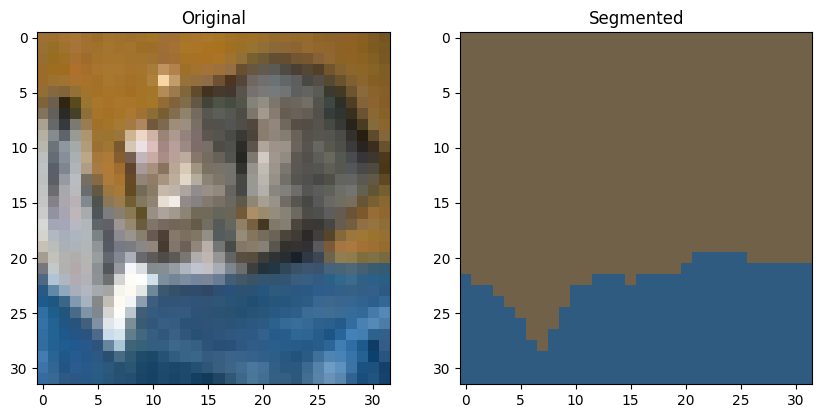

In [9]:
from sklearn.cluster import MeanShift, estimate_bandwidth

image = x_test[0]

# normalize pixels
flat_image = image.reshape(-1,3).astype(float) / 255.0

# estimate bandwidth automatically
bandwidth = estimate_bandwidth(flat_image, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(flat_image)

labels = ms.labels_

# rebuild segmented image using cluster centers
segmented = ms.cluster_centers_[labels]
segmented = segmented.reshape(image.shape)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(image)

plt.subplot(1,2,2)
plt.title("Segmented")
plt.imshow(segmented)

plt.show()
